In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data = sns.load_dataset('iris')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(f'Размер выборки: {len(data)}')

Размер выборки: 150


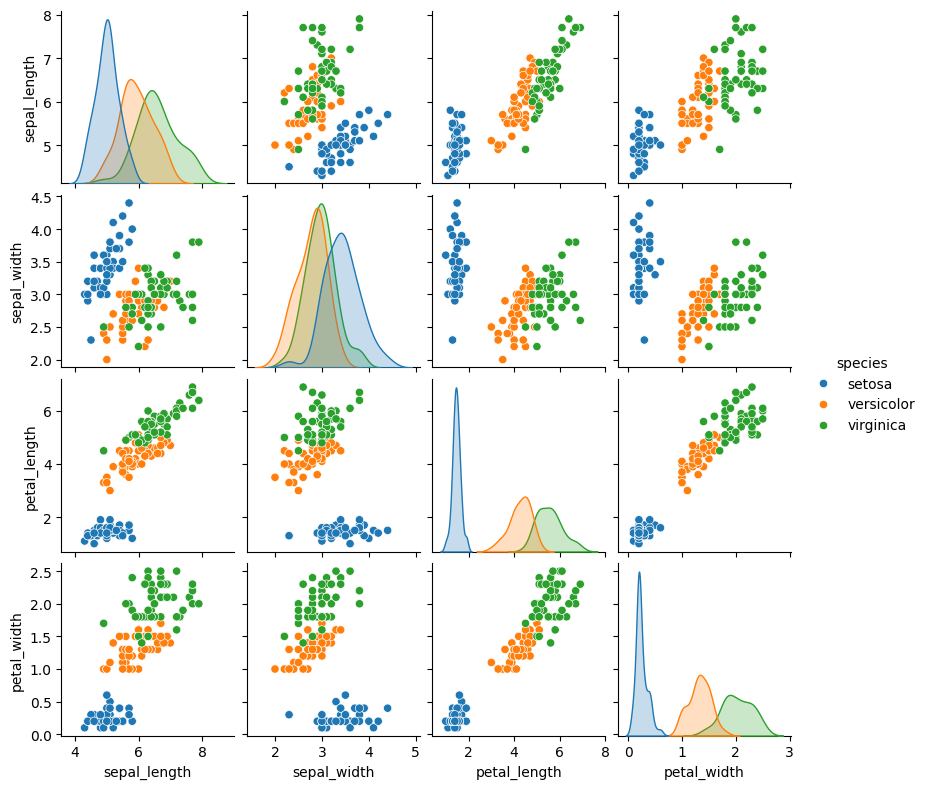

In [4]:
sns.pairplot(data, hue='species', height=2)
plt.show()

In [5]:
binary_dataset = data.drop(index=data.index[data['species'] == 'setosa'])

In [6]:
binary_dataset.iloc[:, 4] = (binary_dataset.iloc[:, 4] == 'virginica').astype(int)

In [7]:
# binary_dataset.iloc[:, :4].values

In [8]:
X = binary_dataset.iloc[:, :4].values
y = binary_dataset['species'].values.astype(int)

In [9]:
len(X) == len(y)

True

In [10]:
logreg = LogisticRegression(random_state=0, max_iter=2000)
model = logreg.fit(X, y)

logreg.coef_

array([[-0.39629303, -0.5122079 ,  2.93019683,  2.41380088]])

In [11]:
max_sep_len = float('-inf')
min_sep_len = float('inf')

max_sep_wid = float('-inf')
min_sep_wid = float('inf')

max_pet_len = float('-inf')
min_pet_len = float('inf')

max_pet_wid = float('-inf')
min_pet_wid = float('inf')

In [12]:
for sl, sw, pl, pw in binary_dataset.iloc[:, :4].values:
  if sl > max_sep_len:
    max_sep_len = sl
  if sl < min_sep_len:
    min_sep_len = sl
  if sw > max_sep_wid:
    max_sep_wid = sw
  if sw < min_sep_wid:
    min_sep_wid = sw
  if pl > max_pet_len:
    max_pet_len = pl
  if pl < min_pet_len:
    min_pet_len = pl
  if pw > max_pet_wid:
    max_pet_wid = pw
  if pw < min_pet_wid:
    min_pet_wid = pw

In [13]:
print(f'sepal_length: max = {max_sep_len}, min = {min_sep_len}')
print(f'sepal_width: max = {max_sep_wid}, min = {min_sep_wid}')
print(f'petal_length: max = {max_pet_len}, min = {min_pet_len}')
print(f'petal_width: max = {max_pet_wid}, min = {min_pet_wid}')

sepal_length: max = 7.9, min = 4.9
sepal_width: max = 3.8, min = 2.0
petal_length: max = 6.9, min = 3.0
petal_width: max = 2.5, min = 1.0


In [14]:
X1 = np.random.uniform(low=min_sep_len, high=max_sep_len, size=5)
X1

array([5.50183054, 5.15253889, 5.47673446, 4.94594589, 7.16562884])

# Генерация синтетической выборки

In [15]:
X1 = np.random.uniform(low=min_sep_len, high=max_sep_len, size=50)
X2 = np.random.uniform(low=min_sep_wid, high=max_sep_wid, size=50)
X3 = np.random.uniform(low=min_pet_len, high=max_pet_len, size=50)
X4 = np.random.uniform(low=min_pet_wid, high=max_pet_wid, size=50)

X_new = np.stack((X1, X2, X3, X4), axis=1)

In [16]:
X_new[:4]

array([[7.66617603, 2.29444227, 4.28816339, 1.25679601],
       [4.95222811, 2.81996714, 5.19949594, 1.5834527 ],
       [7.13794047, 3.49174637, 5.68945087, 1.15869536],
       [7.38177668, 2.67501773, 3.29523854, 2.07971266]])

In [17]:
y_pred = logreg.predict(X_new)

In [18]:
y_pred[:5]

array([0, 1, 1, 0, 1])

In [19]:
len(X_new) == len(y_pred)

True

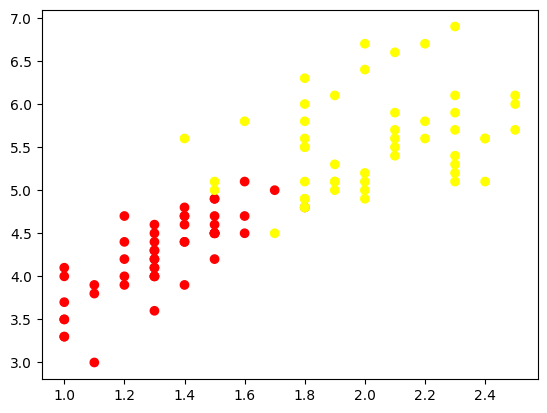

In [20]:
plt.scatter(X[:, 3], X[:, 2], c=y, cmap='autumn')
plt.show()

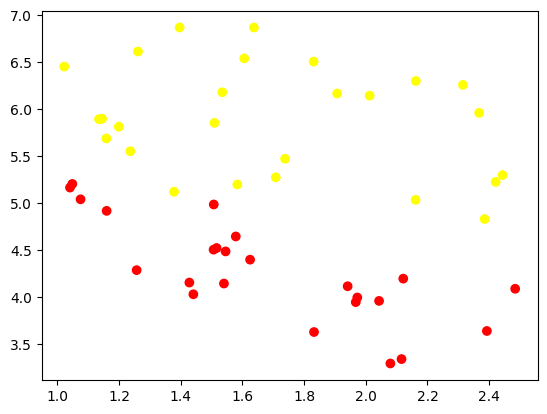

In [21]:
plt.scatter(X_new[:, 3], X_new[:, 2], c=y_pred, cmap='autumn')
plt.show()

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8840 - loss: 0.3634
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0451
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9903 - loss: 0.0330
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9924 - loss: 0.0246
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0164


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc:.3f}\nTest_loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0305
Test accuracy: 0.993
Test_loss: 0.022


**Задание:** На основе блокнота (ноутбука) примера 1 постройте новую модель
сверточных нейронных сетей с 5 слоями Conv2D и 4 слоями
MaxPooling2D для классификации изображений на наборе данных
MNIST.

In [28]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)

x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc:.3f}\nTest_loss: {test_loss:.3f}')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8589 - loss: 0.4220
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0481
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0298
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9936 - loss: 0.0201
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0171
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0412
Test accuracy: 0.990
Test_loss: 0.033


# Cifar-10

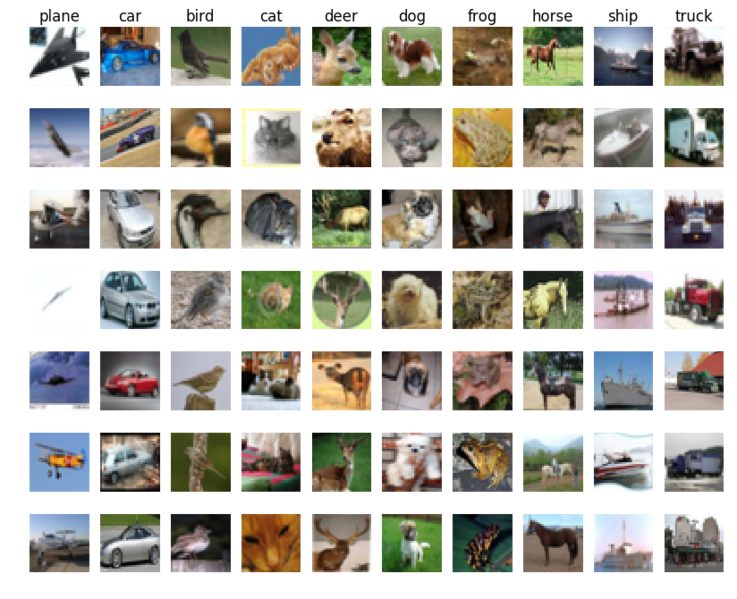

In [30]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [31]:
np.random.seed(42)

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [33]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

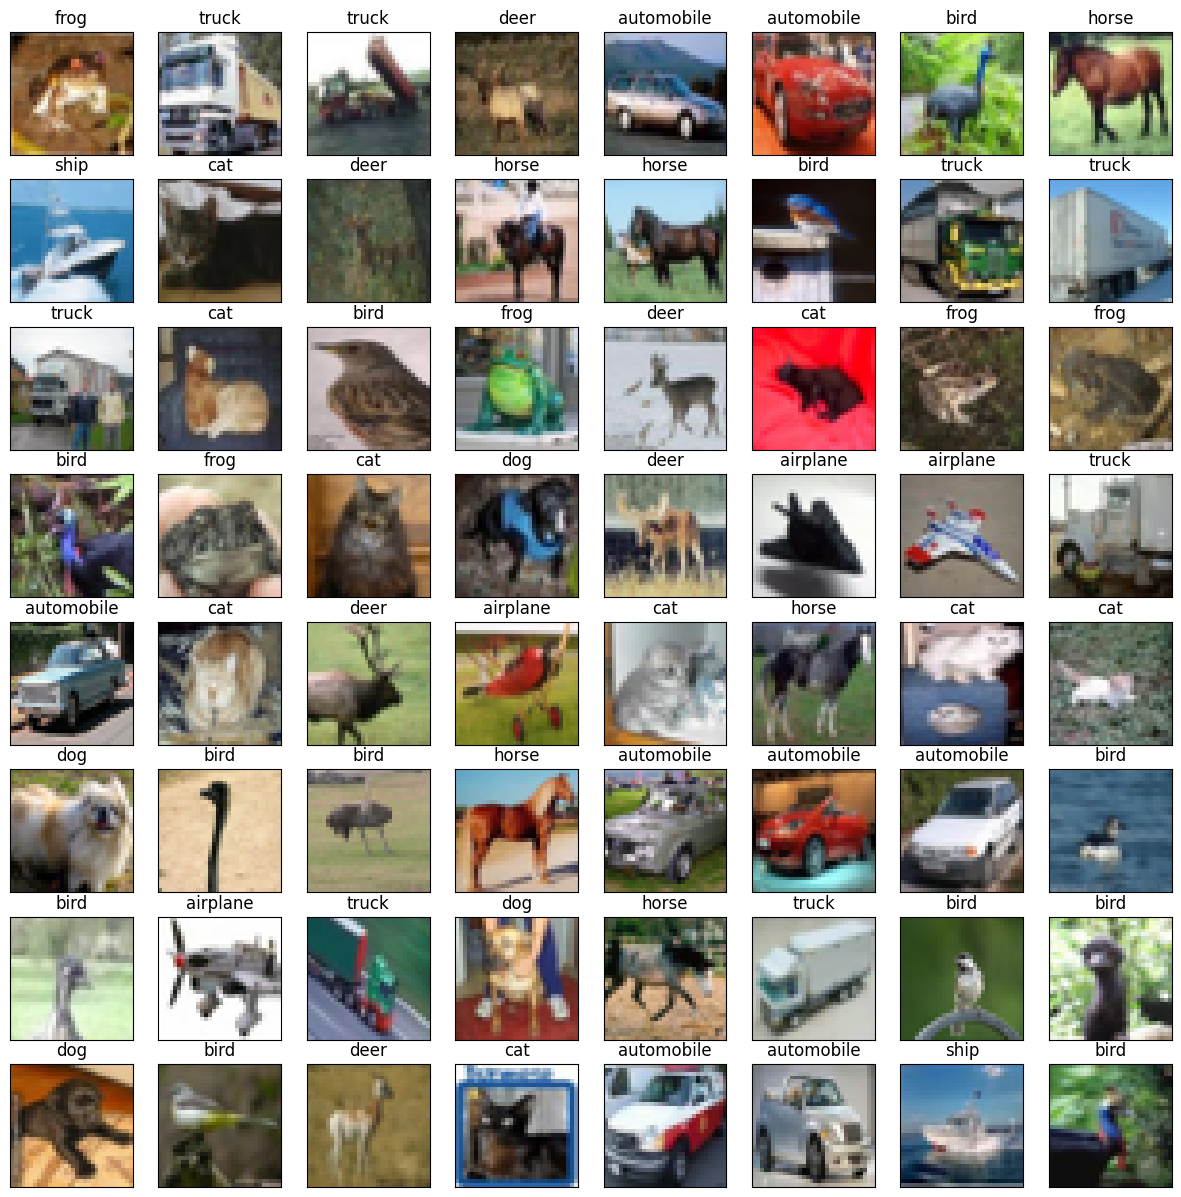

In [34]:
plt.figure(figsize=(15, 15))

for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [35]:
batch_size = 32
classes = 10
epochs = 25
rows, cols = 32, 32
img_chanels = 3

In [36]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [37]:
Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
optimizer = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [40]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

Epoch 1/25
1407/1407 - 13s - 9ms/step - accuracy: 0.4148 - loss: 1.6182 - val_accuracy: 0.5602 - val_loss: 1.2276
Epoch 2/25
1407/1407 - 15s - 11ms/step - accuracy: 0.5586 - loss: 1.2396 - val_accuracy: 0.6200 - val_loss: 1.0872
Epoch 3/25
1407/1407 - 6s - 4ms/step - accuracy: 0.6190 - loss: 1.0795 - val_accuracy: 0.6414 - val_loss: 1.0290
Epoch 4/25
1407/1407 - 6s - 4ms/step - accuracy: 0.6613 - loss: 0.9639 - val_accuracy: 0.6670 - val_loss: 0.9455
Epoch 5/25
1407/1407 - 10s - 7ms/step - accuracy: 0.6991 - loss: 0.8563 - val_accuracy: 0.7002 - val_loss: 0.8819
Epoch 6/25
1407/1407 - 6s - 4ms/step - accuracy: 0.7267 - loss: 0.7732 - val_accuracy: 0.7016 - val_loss: 0.8679
Epoch 7/25
1407/1407 - 6s - 4ms/step - accuracy: 0.7569 - loss: 0.6915 - val_accuracy: 0.7008 - val_loss: 0.8906
Epoch 8/25
1407/1407 - 10s - 7ms/step - accuracy: 0.7801 - loss: 0.6255 - val_accuracy: 0.7072 - val_loss: 0.8922
Epoch 9/25
1407/1407 - 10s - 7ms/step - accuracy: 0.8043 - loss: 0.5606 - val_accuracy: 0.7

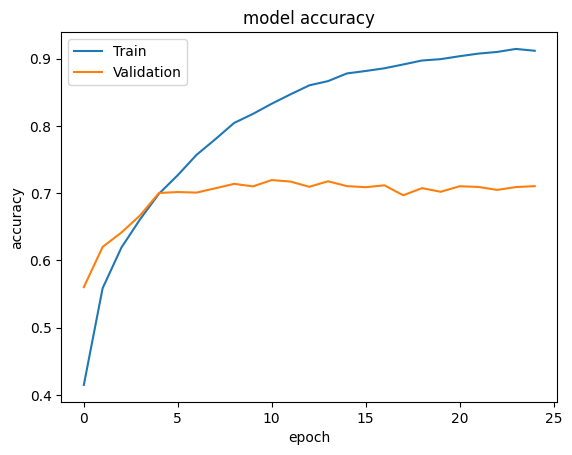

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

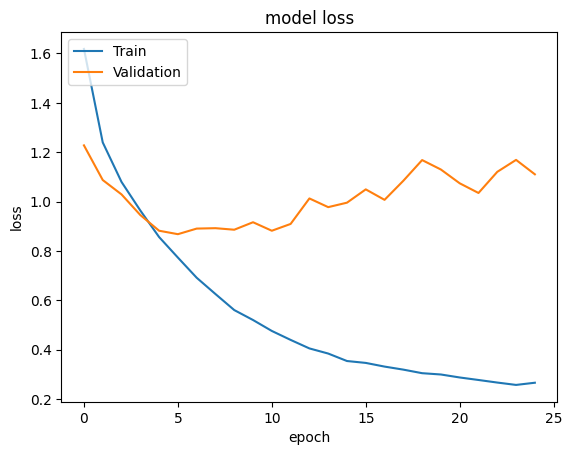

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), padding='same', activation='selu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(classes, activation='softmax')
])

In [44]:
optimizer = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [45]:
epochs = 30
batch_size= 64

In [46]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

Epoch 1/30
704/704 - 13s - 19ms/step - accuracy: 0.2963 - loss: 1.8899 - val_accuracy: 0.4040 - val_loss: 1.6455
Epoch 2/30
704/704 - 3s - 4ms/step - accuracy: 0.4506 - loss: 1.5036 - val_accuracy: 0.3042 - val_loss: 2.2387
Epoch 3/30
704/704 - 5s - 7ms/step - accuracy: 0.5053 - loss: 1.3668 - val_accuracy: 0.5018 - val_loss: 1.3774
Epoch 4/30
704/704 - 3s - 5ms/step - accuracy: 0.5432 - loss: 1.2723 - val_accuracy: 0.5158 - val_loss: 1.3347
Epoch 5/30
704/704 - 5s - 7ms/step - accuracy: 0.5708 - loss: 1.1985 - val_accuracy: 0.6000 - val_loss: 1.1092
Epoch 6/30
704/704 - 5s - 8ms/step - accuracy: 0.5921 - loss: 1.1428 - val_accuracy: 0.6412 - val_loss: 1.0072
Epoch 7/30
704/704 - 3s - 4ms/step - accuracy: 0.6109 - loss: 1.0906 - val_accuracy: 0.5644 - val_loss: 1.2644
Epoch 8/30
704/704 - 5s - 7ms/step - accuracy: 0.6263 - loss: 1.0507 - val_accuracy: 0.6156 - val_loss: 1.0967
Epoch 9/30
704/704 - 6s - 8ms/step - accuracy: 0.6371 - loss: 1.0198 - val_accuracy: 0.6778 - val_loss: 0.9123

In [48]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f'Test accuracy: {test_acc:.3f}\nTest_loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7377 - loss: 0.7652
Test accuracy: 0.733
Test_loss: 0.774


In [50]:
optimizer = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [51]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
#                    validation_split=0.1, no validation
                    shuffle=True,
                    verbose=2)

Epoch 1/30
782/782 - 11s - 14ms/step - accuracy: 0.7426 - loss: 0.7312
Epoch 2/30
782/782 - 5s - 6ms/step - accuracy: 0.7462 - loss: 0.7295
Epoch 3/30
782/782 - 3s - 4ms/step - accuracy: 0.7459 - loss: 0.7249
Epoch 4/30
782/782 - 5s - 7ms/step - accuracy: 0.7477 - loss: 0.7225
Epoch 5/30
782/782 - 5s - 7ms/step - accuracy: 0.7476 - loss: 0.7138
Epoch 6/30
782/782 - 3s - 4ms/step - accuracy: 0.7481 - loss: 0.7161
Epoch 7/30
782/782 - 3s - 4ms/step - accuracy: 0.7510 - loss: 0.7065
Epoch 8/30
782/782 - 4s - 6ms/step - accuracy: 0.7532 - loss: 0.7041
Epoch 9/30
782/782 - 4s - 5ms/step - accuracy: 0.7546 - loss: 0.6961
Epoch 10/30
782/782 - 6s - 7ms/step - accuracy: 0.7534 - loss: 0.6995
Epoch 11/30
782/782 - 4s - 5ms/step - accuracy: 0.7579 - loss: 0.6898
Epoch 12/30
782/782 - 5s - 7ms/step - accuracy: 0.7563 - loss: 0.6926
Epoch 13/30
782/782 - 5s - 7ms/step - accuracy: 0.7600 - loss: 0.6875
Epoch 14/30
782/782 - 3s - 4ms/step - accuracy: 0.7582 - loss: 0.6872
Epoch 15/30
782/782 - 3s - 

In [52]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f'Test accuracy: {test_acc:.3f}\nTest_loss: {test_loss:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7542 - loss: 0.7198
Test accuracy: 0.754
Test_loss: 0.719
